In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize

# Load data
bg_center, bg_width, dk, time = np.loadtxt("data/bg-cen-width-dk-time.txt")

## Bandgap Center Data

In [24]:
# List resolutions that had invalid bandgaps
dk[bg_center == -1]

array([0.08461539, 0.14461538, 0.16769231, 0.17230769])

In [25]:
filt = bg_center != -1

# Compare bandgap center average to wavenumber weighted bandgap center average
dk_avg = np.average(bg_center[filt], weights=dk[filt])
print(f"Wavenumber weighted bandgap center average: {dk_avg / 1e12:.3f} THz")

bg_center_avg = np.average(bg_center[filt])
print(f"Bandgap center average: {bg_center_avg / 1e12:.3f} THz")

# Find bandgap center standard deviation
bg_center_std = np.std(bg_center[filt])
print(f"Bandgap center standard deviation: {bg_center_std / 1e12:.3f} THz")

Wavenumber weighted bandgap center average: 208.059 THz
Bandgap center average: 207.745 THz
Bandgap center standard deviation: 9.883 THz


In [26]:
# Find out the fraction of points that are within 1 standard deviation of the average
within_1std = np.sum(np.abs(bg_center[filt] - bg_center_avg) < bg_center_std)
print(f"Fraction of points within 1 standard deviation: {within_1std}/{len(bg_center[filt])} ({within_1std / len(bg_center[filt]):.3f})")

Fraction of points within 1 standard deviation: 30/36 (0.833)


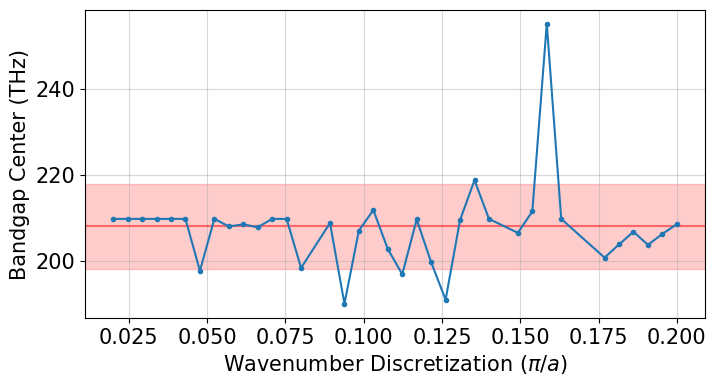

In [27]:
# Plot bandgap center vs. wavenumber resolution
fontsize = 15
fig, ax = plt.subplots(figsize=(8, 4))
ax.tick_params(labelsize=fontsize)

# Plot average bandgap center
ax.axhline(dk_avg / 1e12, color="r", ls="-", label="Wavenumber Weighted Average", alpha=0.5)

# Plot standard deviation
ax.axhspan((dk_avg - bg_center_std) / 1e12, (dk_avg + bg_center_std) / 1e12, color="r", alpha=0.2, label="Standard Deviation")

ax.plot(dk[filt], bg_center[filt] / 1e12, "-o", ms=3, zorder=10)
ax.set_xlabel(r"Wavenumber Discretization ($\pi/a$)", fontsize=fontsize)
ax.set_ylabel(r"Bandgap Center (THz)", fontsize=fontsize)
ax.grid(alpha=0.5)

# Save figure
fig.savefig("figures/bg-cen-vs-dk.png", dpi=300, bbox_inches="tight")
plt.show()

## Bandgap Width Data

In [28]:
filt = bg_width != -1

# Compare bandgap width average to wavenumber weighted bandgap width average
dk_avg = np.average(bg_width[filt], weights=dk[filt])
print(f"Wavenumber weighted bandgap width average: {dk_avg / 1e12:.3f} THz")

bg_width_avg = np.average(bg_width[filt])
print(f"Bandgap width average: {bg_width_avg / 1e12:.3f} THz")

# Find bandgap width standard deviation
bg_width_std = np.std(bg_width[filt])
print(f"Bandgap width standard deviation: {bg_width_std / 1e12:.3f} THz")

Wavenumber weighted bandgap width average: 43.071 THz
Bandgap width average: 43.684 THz
Bandgap width standard deviation: 9.597 THz


In [29]:
# Find out the fraction of points that are within 1 standard deviation of the average
within_1std = np.sum(np.abs(bg_width[filt] - bg_width_avg) < bg_width_std)
print(f"Fraction of points within 1 standard deviation: {within_1std}/{len(bg_width[filt])} ({within_1std / len(bg_width[filt]):.3f})")

Fraction of points within 1 standard deviation: 28/36 (0.778)


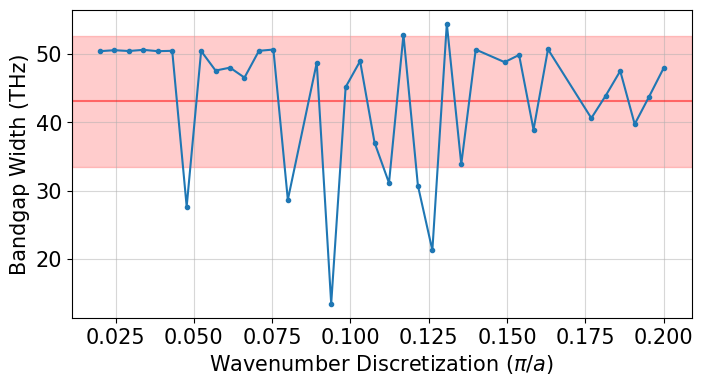

In [30]:
# Plot bandgap width vs. wavenumber resolution
fontsize = 15
fig, ax = plt.subplots(figsize=(8, 4))
ax.tick_params(labelsize=fontsize)

# Plot average bandgap width
ax.axhline(dk_avg / 1e12, color="r", ls="-", label="Wavenumber Weighted Average", alpha=0.5)

# Plot standard deviation
ax.axhspan((dk_avg - bg_width_std) / 1e12, (dk_avg + bg_width_std) / 1e12, color="r", alpha=0.2, label="Standard Deviation")

ax.plot(dk[filt], bg_width[filt] / 1e12, "-o", ms=3)
ax.set_xlabel(r"Wavenumber Discretization ($\pi/a$)", fontsize=fontsize)
ax.set_ylabel("Bandgap Width (THz)", fontsize=fontsize)
ax.grid(alpha=0.5)

# Save figure
fig.savefig("figures/bg-width-vs-dk.png", dpi=300, bbox_inches="tight")
plt.show()

## Time Data

In [31]:
# Find average time
time_avg = np.average(time)
print(f"Average time: {time_avg:.3f} s")

# Find time standard deviation
time_std = np.std(time)
print(f"Time standard deviation: {time_std:.3f} s")

Average time: 52.899 s
Time standard deviation: 39.376 s


Slope: -0.932
Intercept: 1.572


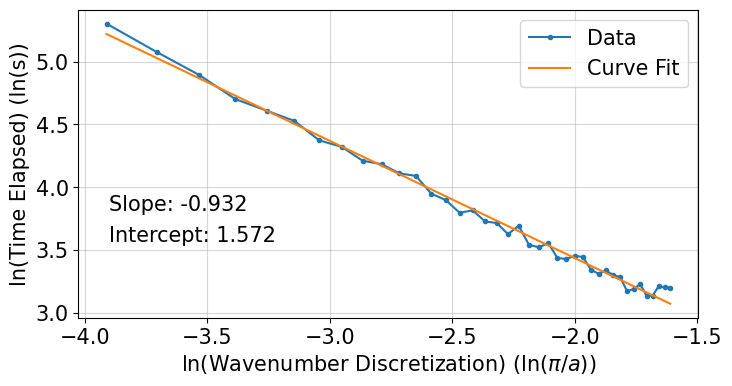

In [32]:
# Curve fit to find slope and intercept of log-log plot
def func(x, a, b):
    return a + b * x

popt, pcov = optimize.curve_fit(func, np.log(dk), np.log(time))
print(f"Slope: {popt[1]:.3f}")
print(f"Intercept: {popt[0]:.3f}")

# Plot curve fit
fontsize = 15
fig, ax = plt.subplots(figsize=(8, 4))
ax.tick_params(labelsize=fontsize)

x = np.linspace(np.log(dk).min(), np.log(dk).max(), 100)
ax.plot(np.log(dk), np.log(time), "-o", ms=3, label="Data")
ax.plot(x, func(x, *popt), label="Curve Fit")

# Write slope and intercept on plot
ax.text(0.05, 0.40, f"Slope: {popt[1]:.3f}", transform=ax.transAxes, fontsize=fontsize, va="top")
ax.text(0.05, 0.30, f"Intercept: {popt[0]:.3f}", transform=ax.transAxes, fontsize=fontsize, va="top")

ax.set_xlabel(r"ln(Wavenumber Discretization) (ln($\pi/a$))", fontsize=fontsize)
ax.set_ylabel(r"ln(Time Elapsed) (ln(s))", fontsize=fontsize)
ax.legend(fontsize=fontsize)
ax.grid(alpha=0.5)

# Save figure
fig.savefig("figures/log-time-vs-dk.png", dpi=300, bbox_inches="tight")
plt.show()

Exponential amplitude: 4.817
Exponential decay constant: -0.932


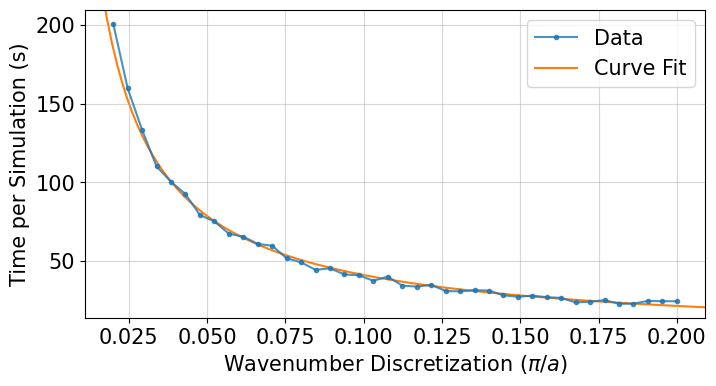

In [33]:
# Plot time vs. wavenumber resolution
fontsize = 15
fig, ax = plt.subplots(figsize=(8, 4))
ax.tick_params(labelsize=fontsize)

# Plot time vs. wavenumber resolution
ax.plot(dk, time, "-o", c="C0", ms=3, label="Data", zorder=10, alpha=0.8)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Plot curve fit
x = np.linspace(0.01, 0.25, 150)
ax.plot(x, np.exp(popt[0]) * np.exp(popt[1] * np.log(x)), label="Curve Fit", c="C1", zorder=0)
print(f"Exponential amplitude: {np.exp(popt[0]):.3f}")
print(f"Exponential decay constant: {popt[1]:.3f}")

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel(r"Wavenumber Discretization ($\pi/a$)", fontsize=fontsize)
ax.set_ylabel(r"Time per Simulation (s)", fontsize=fontsize)
ax.grid(alpha=0.5)
ax.legend(fontsize=fontsize)

# Save figure
fig.savefig("figures/time-vs-dk.png", dpi=300, bbox_inches="tight")
plt.show()